
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [4]:
med_charges = pd.read_csv("/content/drive/MyDrive/ML course/data/medical-charges.csv")

In [5]:
med_charges

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


На мою думку потрібно провести такі аналітичні порівняння:
- залежність charges від age
- залежність charges від bmi
- залежність charges від smoker (тут думаю буде найбільший вплив)
- залежність charges від region, можливо мало інформативно буде
- bmi від region, навряд чи дасть якісь інсайди для charges, але буде розуміння чи є залежність для ще якигось зовнішніх або додаткових параметрів
- charges від bmi та age
- charges від bmi та smoker

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [6]:
fig = px.histogram(med_charges,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['pink', 'blue'],
                   title='Medical Charges Distribution sex')
fig.update_layout(bargap=0.1)
fig.show()

По гістограмі видно, що розподіл по статі є практично рівний кількісно.
Цікаво що по найменших платежах кількісно більше чоловіків ніж жінок, у наступному біні картина - навпаки, а далі практично вирівнюється.
починаючи з 30к платежів чоловіків переважно більше, є кілька сум, де переважають жінки, що є викидами із загальної картинки.
IQR більш розтягнутий у чоловіків, що логічно, бо після 30к чоловіків більше є і відповідно IQR теж розтягнеться.

In [7]:
fig = px.histogram(med_charges,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Medical Charges Distribution region')
fig.update_layout(bargap=0.1)
fig.show()

По регіональній гістограмі можна дослідити, що регіон southeast найбільший по кількості клієнтів і має найрозтягнутіший IQR по сумі платежів, 2 найбільші викиди по найбільших charges є з регіону southeast.
По платежах до 25к регіональність приблизо однакова, десь переважає один, десь другий регіон
Після суми приблизно 36к southeast регіон переважає кількісно. Можна сказати, що по найбільших charges займає лідируючу позицію регіон southeast.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [8]:
px.histogram(med_charges, x='region', color='smoker', title='Smoker by region')

Найбільше курців є у southeast. Інші регіони мають приблизно однакову кільксть курців.

In [9]:
px.histogram(med_charges, x='children', color='smoker', title='Smoker by children')

По гістограмі видно, що найбільше курців серед людей, які не мають дітей.
Також можна сказати, що чим більше дітей у клієнта тим менше курців, **але це кількісно**. Проте відношення курців до не курців не дуже то і міняється
- без дітей ~ 1/4
- 1 дитина ~ 1/4
- 2 дитини ~ між 1/3 та 1/4
- 3 дитини ~ 1/3.
Тобто чіткої залежності % курців від кількості дітей немає, співвідношення практично однакове, лише для клієнтів 4 і 5 дітей значно менше % курців, але таких клієнтів є дуже мало.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [10]:
px.violin(med_charges, y="charges", color="children", box = True)

Violin графік показує щільність точок даних для певного рівня значень charges. Додатково відобразив боксплоти і по них видно, що від 0 до 3 дітей charges ростуть і їхнє положення боксплотів і найбільші концентрації значень, 4-5 дітей плавно спадають.
Ріст 0-2 може ще бути пов'язаний з віком, чим більше дітей тим більша ймовірність вищого віку клієнта.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [11]:
non_smoker_df = med_charges[med_charges.smoker == 'no']

In [125]:
def estimate_charges(age, w, b):
    return w * age + b

In [15]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

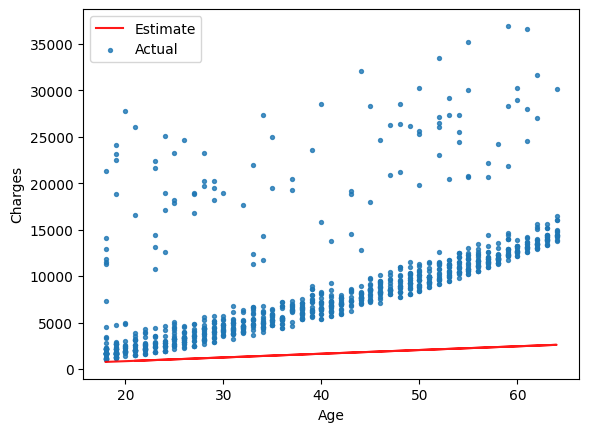

In [22]:
try_parameters(non_smoker_df, 40, 50)

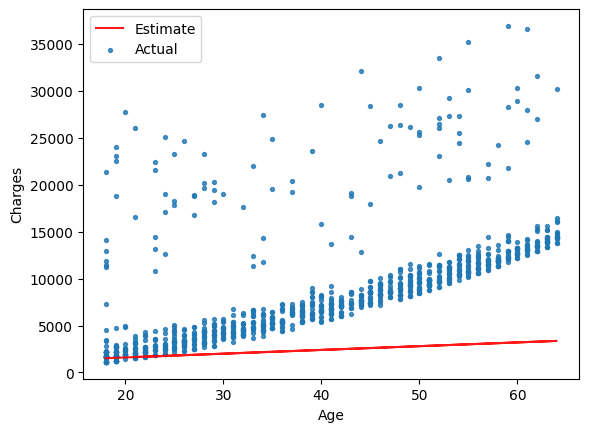

In [23]:
try_parameters(non_smoker_df, 40, 800)

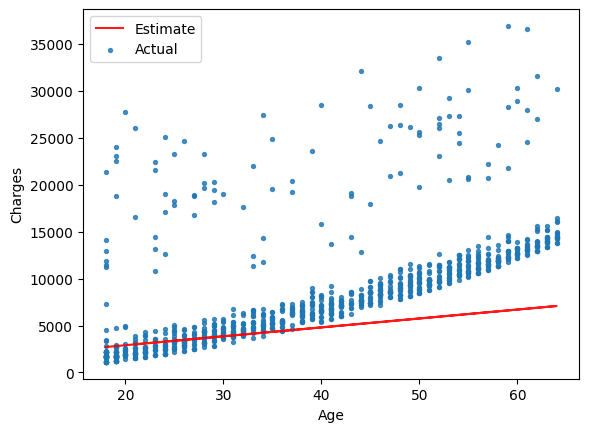

In [117]:
try_parameters(non_smoker_df, 95, 1000)

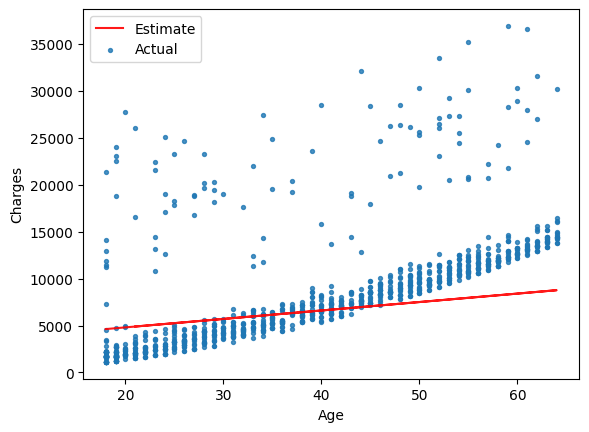

In [19]:
try_parameters(non_smoker_df, 90, 3000)

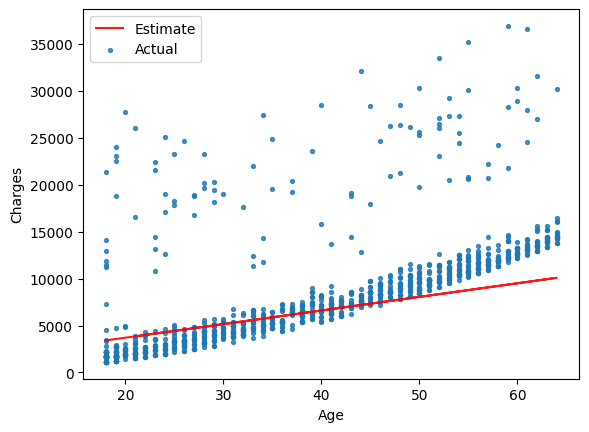

In [118]:
try_parameters(non_smoker_df, 145, 800)

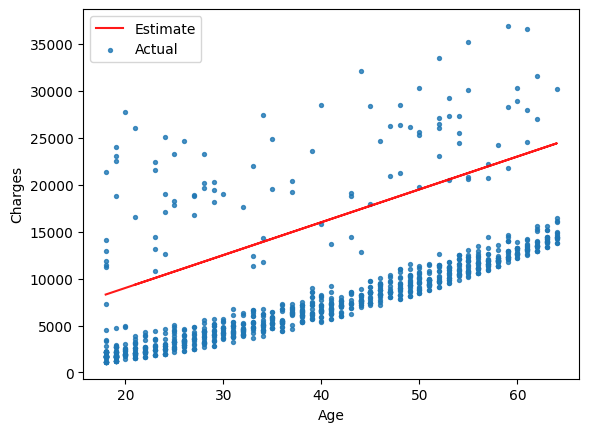

In [44]:
try_parameters(non_smoker_df, 350, 2000)

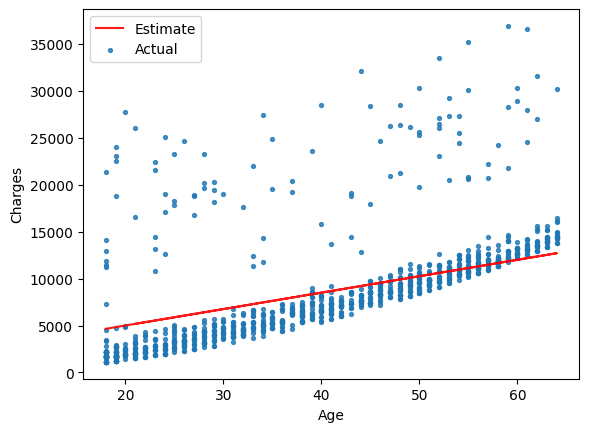

In [45]:
try_parameters(non_smoker_df, 175, 1500)

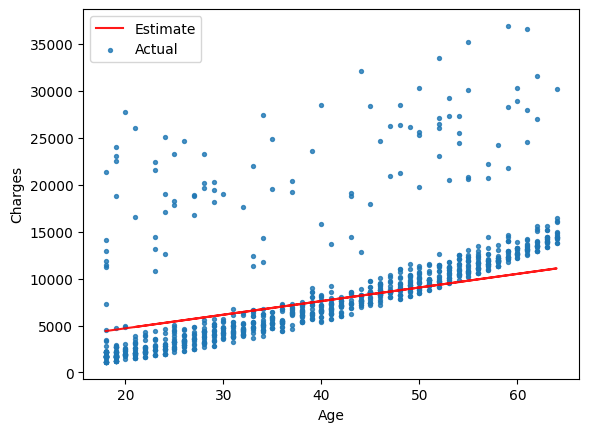

In [49]:
try_parameters(non_smoker_df, 145, 1800)

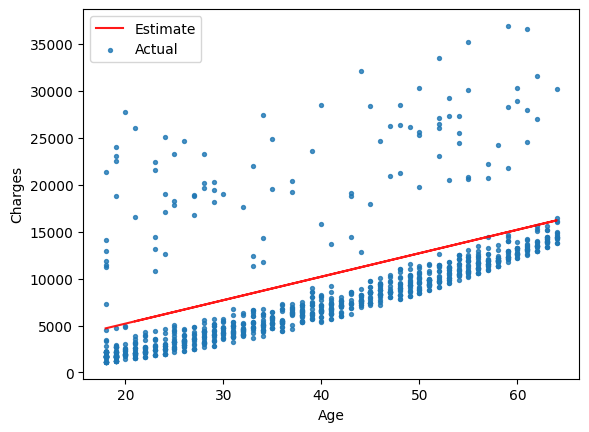

In [53]:
try_parameters(non_smoker_df, 250, 200)

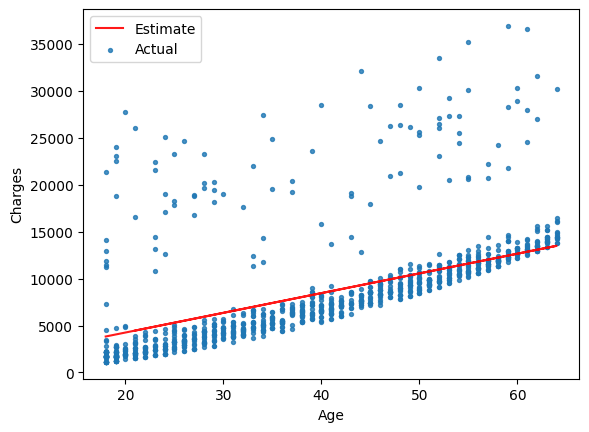

In [116]:
try_parameters(non_smoker_df, 210, 50)

На мою думку, при даній моделі такі коефіцієнти будуть одними з найкращих, оскільки на початку(age 20) враховує більше аутлаєрів бо знаходиться вище скупчення тенденції, а в кінці(age 60) тенденція рідшає і аутлаєрів менше.

З однієї сторони можна підбирати так, щоб по-максимуму закрити 20-40 діапазон, але тоді не попадаємо зовсім у діапазон 40-60, а там більші charges.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [122]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [128]:
targets = non_smoker_df['charges']

In [137]:
def try_parameters_loss(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

    predictions = estimate_charges(non_smoker_df.age, w, b)

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8850.573441756202


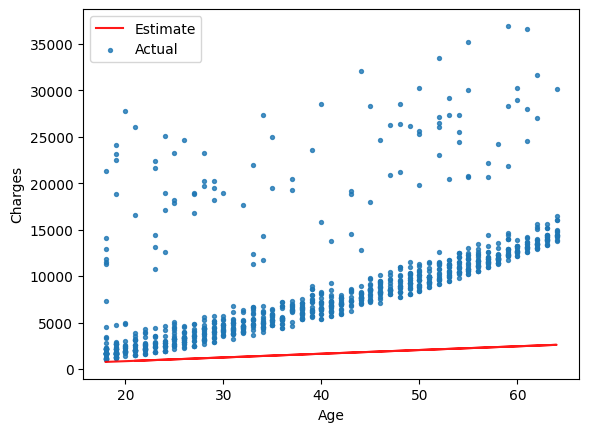

In [138]:
try_parameters_loss(non_smoker_df, 40, 50)

RMSE Loss:  8287.452449449576


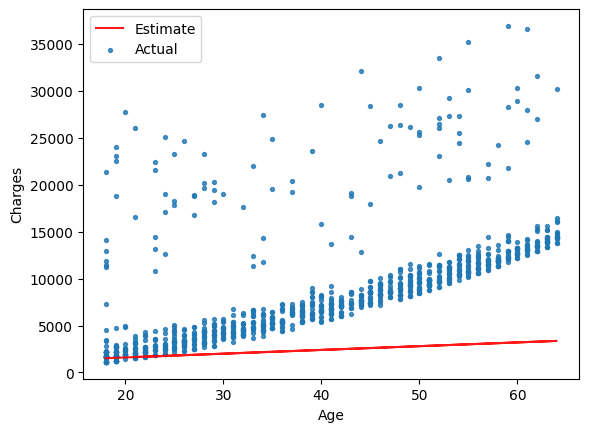

In [139]:
try_parameters_loss(non_smoker_df, 40, 800)

RMSE Loss:  6422.92253416596


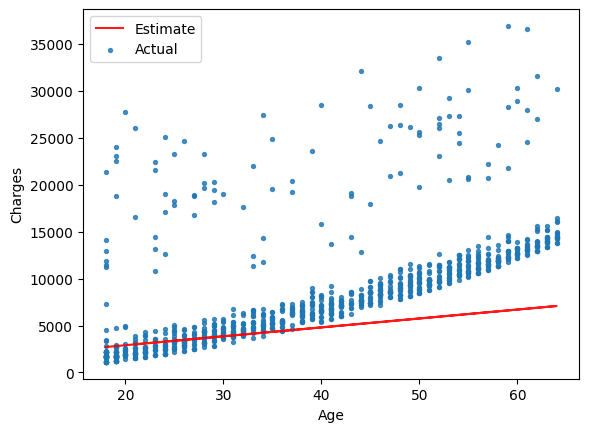

In [140]:
try_parameters_loss(non_smoker_df, 95, 1000)

RMSE Loss:  5615.603725804765


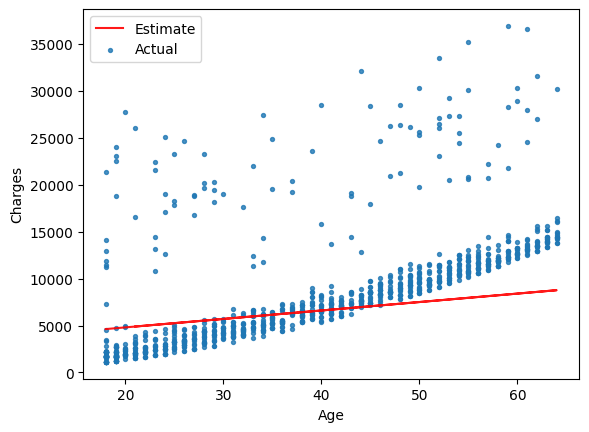

In [141]:
try_parameters_loss(non_smoker_df, 90, 3000)

RMSE Loss:  5329.146923597809


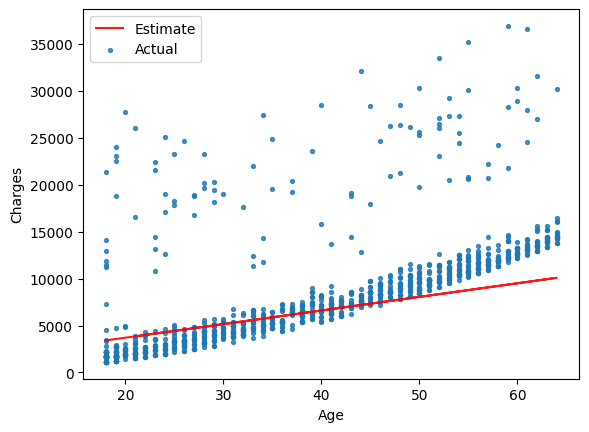

In [142]:
try_parameters_loss(non_smoker_df, 145, 800)

RMSE Loss:  8782.209495286392


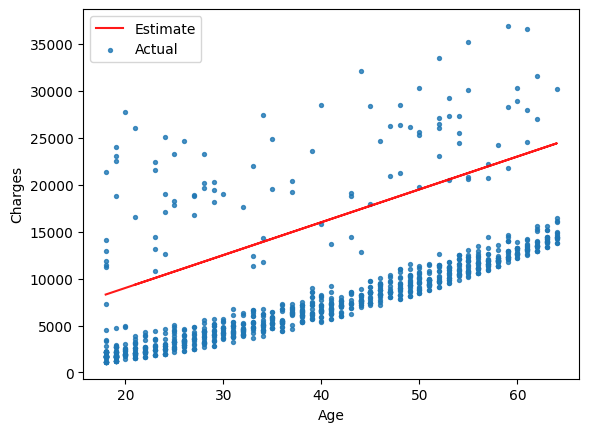

In [143]:
try_parameters_loss(non_smoker_df, 350, 2000)

RMSE Loss:  4840.143647794038


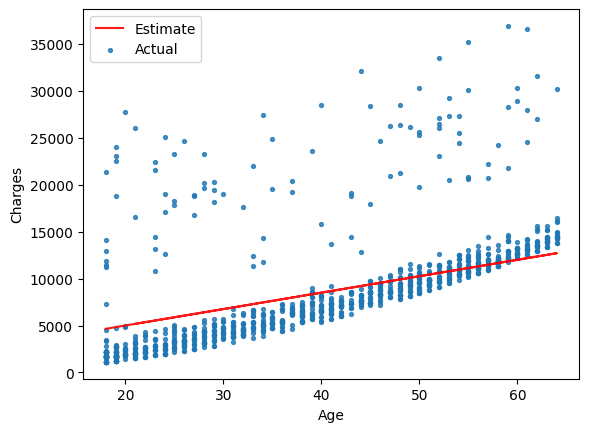

In [144]:
try_parameters_loss(non_smoker_df, 175, 1500)

RMSE Loss:  5054.999352906026


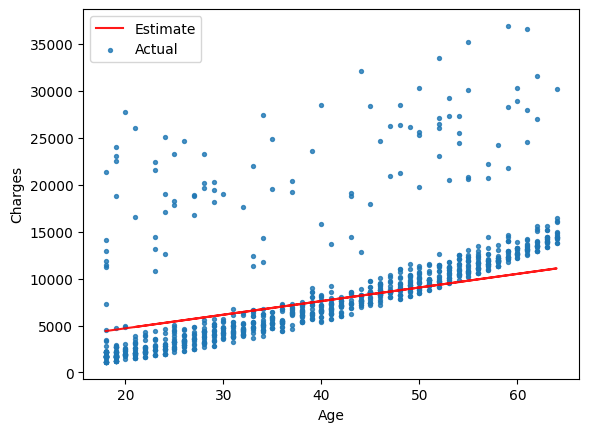

In [145]:
try_parameters_loss(non_smoker_df, 145, 1800)

RMSE Loss:  4939.298949557628


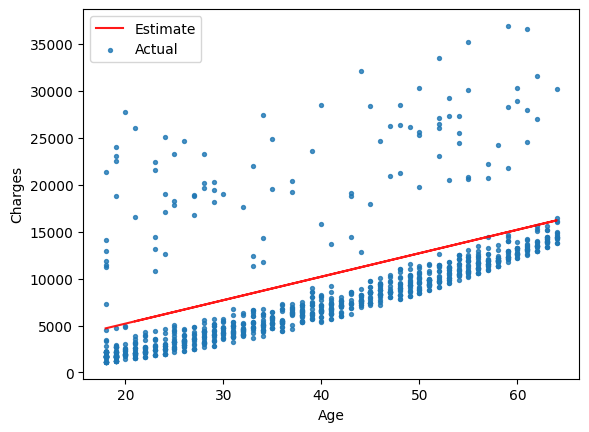

In [146]:
try_parameters_loss(non_smoker_df, 250, 200)

RMSE Loss:  4732.99606109111


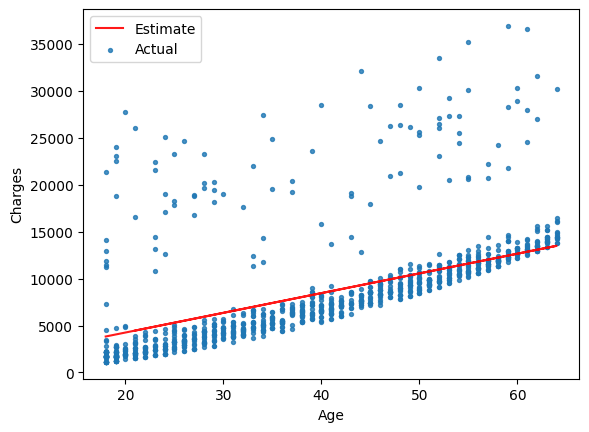

In [147]:
try_parameters_loss(non_smoker_df, 210, 50)

RMSE Loss:  4828.417369584835


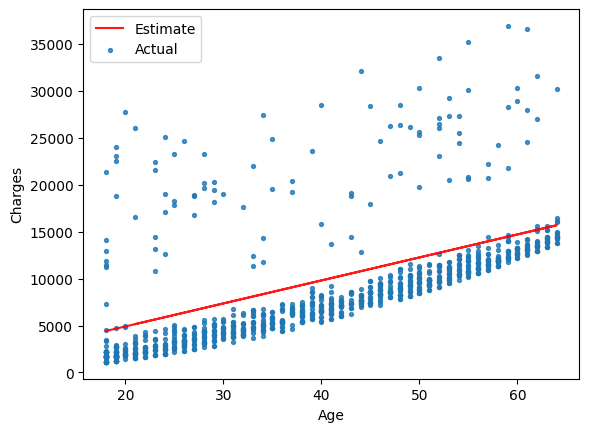

In [152]:
try_parameters_loss(non_smoker_df, 245, 0)

Найнижче значення, яке вдалося досягнути 4733. Власне підтвердилось те, якого я добився візуально у попередньому завданні.

Для даної моделі при даному розпиленні даних стратегія полягає у захопленні чим по більше даних, які утворюють тенденцію, але і з врахуванням викидів, які є вище.

Мій метод проб і помилок заключався у тому, щоб на початку в районі 20 років накласти модель вище трошки від загальної тенденції і далі вже підганяти кут зміною w та b коефіцієнтів. Провівши кілька досліджень, я побачив, що збільшення w менше впливає на початок графіку та сильніше задирає кінець. Збільшення b - сильно піднімає початок та зменшує кінець. На початку вплив b - відчутний, а в кінці майже не видно його. І відштовхуючись від цього я підбирав візуально коефіцієнти, які найбільше підходять.

